## L1 sampling simulation

## Sample uniformly from l1-ball

According to: https://mathoverflow.net/questions/9185/how-to-generate-random-points-in-ell-p-balls

Sample $X_n \sim \exp(-|x|^p)$

Sample $Y \sim exponential(1)$

<br/>

$\frac{(X_1,\ldots,X_n)}{(Y+\sum |X_i|^p)^{1/p}}$

In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

def generate_samples(N, D, p):
    # Sample n values from the distribution exp(-|x|^p)
    Xn = torch.empty(N, D).exponential_(1)
    Xn *= torch.randint(0, 2, size=(N, D)) * 2 - 1  # Randomly assign signs

    # Sample a value from the exponential distribution with parameter 1
    Y = torch.empty(N, D).exponential_(1)

    # Calculate the ratio (X1, ..., Xn) / (Y + sum(|Xi|^p))^(1/p)
    denominator = Y + torch.sum(torch.abs(Xn)**p, dim=1, keepdim=True)
    samples = Xn / denominator**(1/p)

    return samples

# Set the value of p
p = 1

# Set the number of samples (N) and dimension (D)
N = 5
D = 3

# Generate samples
samples = generate_samples(N, D, p)

# Print the result
print("Generated samples matrix:")
print(samples)

Generated samples matrix:
tensor([[-0.2039,  0.1092,  0.3060],
        [-0.2934, -0.0095,  0.3311],
        [-0.3351,  0.0617,  0.0394],
        [-0.2344, -0.0594,  0.4203],
        [ 0.3244, -0.0852, -0.3573]])


In [29]:
def generate_samples(N, D, p):
    gaussian = (torch.rand(N, D) - 0.5) * 2
    #angles = gaussian / torch.norm(gaussian, p=2, dim=1, keepdim=True)

    return gaussian

In [37]:
samples = generate_samples(10000, 2, 1) #32 times!
samples.shape

torch.Size([10000, 2])

In [76]:
# for i in range(31):
#     samples = torch.cat((samples, generate_samples(10000, 2, 1)), dim=1)

In [38]:
samples.shape

torch.Size([10000, 2])

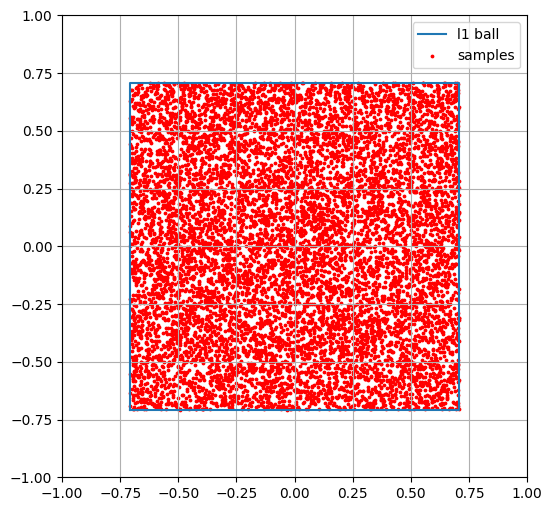

In [39]:
x_coords, y_coords = list(zip(*samples[:, 0:2]))
x_coords, y_coords = x_coords * 1/np.sqrt(2), y_coords * 1/np.sqrt(2)

# l1_points = [(-1, 0), (0, 1), (1, 0), (0, -1), (-1, 0)]
l1_points = [(-1, -1), (-1, 1), (1, 1), (1, -1), (-1, -1)] * 1/np.sqrt(2)
x_coords_box, y_coords_box = zip(*l1_points)

plt.plot(x_coords_box, y_coords_box, marker='', label='l1 ball')
plt.scatter(x_coords, y_coords, color='red', label='samples', s=3)  # Adjust color as needed
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.show()

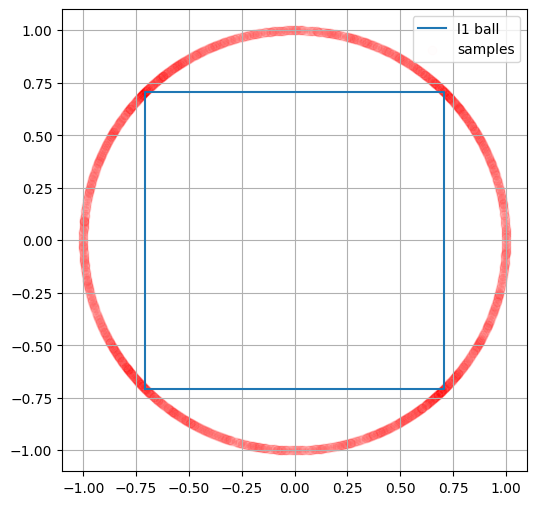

In [40]:
samples_norm = samples / torch.norm(samples, p=2, dim=1, keepdim=True)

x_coords_norm, y_coords_norm = list(zip(*samples_norm[:, 0:2]))
#x_coords_norm, y_coords_norm = (x_coords_norm+y_coords_norm)

plt.plot(x_coords_box, y_coords_box, marker='', label='l1 ball')
plt.scatter(x_coords_norm, y_coords_norm, color='red', label='samples', s=40, alpha=0.008)  # Adjust color as needed
plt.grid(True)
plt.legend()
plt.show()

## Check dimensions of new functions

In [27]:
from training.priors import angles_l1_prior, angles_uniform_prior
from torch.distributions import Beta
import torch

In [45]:
N = 128
D = 2
beta_gen = Beta(torch.FloatTensor([N / 2.]), torch.FloatTensor([D / 2.]))
sample_norm = beta_gen.sample().double()

angles = angles_l1_prior(B=1, N=N, device="cpu")
# angles = angles_uniform_prior(B=1, N=N, device="cpu")

init_sample = angles * sample_norm
init_sample

tensor([[-8.3940e-02, -5.5795e-02,  1.8841e-04, -1.1533e-01, -9.1212e-02,
          8.9688e-02,  1.8532e-02,  1.3153e-01,  2.3731e-02, -3.9847e-02,
         -7.4135e-02, -9.2946e-02, -8.7513e-02, -1.2989e-01, -4.6829e-02,
          6.7280e-02,  2.2923e-02,  2.4853e-01, -3.8735e-02, -8.9919e-03,
          6.8328e-02, -2.0654e-02,  9.1449e-02, -4.9830e-03, -4.3087e-03,
          3.3393e-02,  9.8588e-02,  9.9868e-02,  2.2474e-02, -5.8691e-02,
         -4.0795e-02, -3.9959e-02,  1.1799e-01, -5.9858e-02,  7.4101e-03,
         -1.5568e-01,  1.5219e-02,  1.1132e-01, -2.6428e-02, -6.4361e-02,
          8.6930e-02,  2.0979e-01, -1.4375e-01,  3.1637e-02,  1.6865e-02,
         -4.9967e-02,  5.2090e-02,  2.0534e-01, -7.2705e-03,  1.0767e-02,
         -2.5970e-02,  3.8049e-02,  8.7968e-02, -5.6174e-02, -1.0466e-01,
         -1.9698e-02,  1.1810e-01,  1.1018e-01, -7.9127e-02, -1.4767e-02,
          5.1971e-03,  1.1395e-01,  5.3346e-02,  8.5864e-03,  7.3125e-02,
         -1.3924e-02, -1.1911e-02, -1.